# Тема “Обучение без учителя”

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams.update({'font.size': 8})

Создайте датафреймы X и y из этих данных.

In [4]:
boston = load_boston()

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['Price'])

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


Масштабируйте данные с помощью StandardScaler.

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

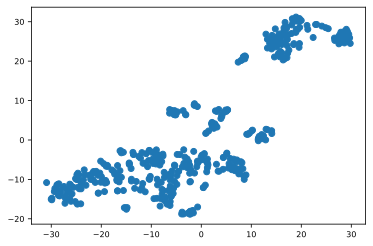

In [26]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [27]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

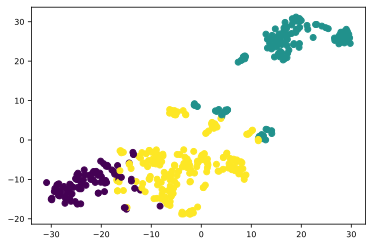

In [29]:
train_labels = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [60]:
print(f'Среднее значение price_train:\
      \nClaster 0:\t{round(y_train.loc[train_labels == 0, "Price"].mean(), 3)}\
      \nClaster 1:\t{round(y_train.loc[train_labels == 1, "Price"].mean(), 3)}\
      \nClaster 2:\t{round(y_train.loc[train_labels == 2, "Price"].mean(), 3)}')

Среднее значение price:      
Claster 0:	27.788      
Claster 1:	16.165      
Claster 2:	24.958


In [61]:
print(f'Среднее значение CRIM_train:\
      \nClaster 0:\t{round(X_train.loc[train_labels == 0, "CRIM"].mean(), 3)}\
      \nClaster 1:\t{round(X_train.loc[train_labels == 1, "CRIM"].mean(), 3)}\
      \nClaster 2:\t{round(X_train.loc[train_labels == 2, "CRIM"].mean(), 3)}')

Среднее значение CRIM:      
Claster 0:	0.074      
Claster 1:	10.797      
Claster 2:	0.422


#### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [64]:
test_labels = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [65]:
print(f'Среднее значение price_test:\
      \nClaster 0:\t{round(y_test.loc[test_labels == 0, "Price"].mean(), 3)}\
      \nClaster 1:\t{round(y_test.loc[test_labels == 1, "Price"].mean(), 3)}\
      \nClaster 2:\t{round(y_test.loc[test_labels == 2, "Price"].mean(), 3)}')

Среднее значение price_test:      
Claster 0:	31.35      
Claster 1:	16.437      
Claster 2:	21.861


In [66]:
print(f'Среднее значение CRIM_test:\
      \nClaster 0:\t{round(X_test.loc[test_labels == 0, "CRIM"].mean(), 3)}\
      \nClaster 1:\t{round(X_test.loc[test_labels == 1, "CRIM"].mean(), 3)}\
      \nClaster 2:\t{round(X_test.loc[test_labels == 2, "CRIM"].mean(), 3)}')

Среднее значение CRIM_test:      
Claster 0:	0.062      
Claster 1:	10.166      
Claster 2:	0.266
